In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
from sklearn.metrics import confusion_matrix,roc_auc_score
%matplotlib inline

AMPds2 dataset의 경우

In [3]:

#your label_list, score_list, recon_err의 Paht
label_list=np.load('/content/drive/MyDrive/dataverse_files/label_list (1).npy')
score_list=np.load('/content/drive/MyDrive/dataverse_files/score_list (1).npy')
recon_err=np.load('/content/drive/MyDrive/dataverse_files/recon_err (1).npy')

In [4]:
#your csv data path
Power_path= '/content/drive/MyDrive/dataverse_files/Electricity_WHE_labeled.csv'

In [5]:
#data load
Power = pd.read_csv(Power_path)

# Split 8:2, MLE on normal_val for test dataset
Power_train = Power.iloc[:int(len(Power)*0.8)]
Power_test = Power.iloc[int(len(Power)*0.8):]

In [6]:
#threshold
threshold = np.mean(score_list)+3*np.std(score_list)

In [7]:
  #Predict abnormal
y_pred = [int(score>threshold) for score in score_list]
Power_test['y_pred']=y_pred
Power_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,unix_ts,V,I,f,DPF,APF,P,Pt,Q,Qt,S,St,label,y_pred
840960,840960,1383721200,244.3,11.5,60.00,1.0,0.95,1343,16319794,182,2323320,1424,17677561,0,0
840961,840961,1383721260,244.9,11.7,60.00,1.0,0.96,1375,16319816,184,2323323,1497,17677586,0,0
840962,840962,1383721320,244.6,12.0,60.06,1.0,0.96,1407,16319841,182,2323326,1494,17677611,0,0
840963,840963,1383721380,244.7,10.1,60.00,1.0,0.91,1128,16319862,159,2323329,1295,17677633,0,0
840964,840964,1383721440,245.0,9.6,60.00,1.0,0.91,1073,16319881,150,2323332,1238,17677654,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051195,1051195,1396335300,243.5,5.5,60.00,1.0,0.85,534,20488006,168,2872949,737,22164619,0,0
1051196,1051196,1396335360,242.6,5.4,60.00,1.0,0.84,520,20488014,167,2872952,727,22164629,0,0
1051197,1051197,1396335420,242.8,5.5,60.00,1.0,0.83,525,20488023,168,2872954,737,22164641,0,0
1051198,1051198,1396335480,242.7,5.5,60.00,1.0,0.83,530,20488033,163,2872956,742,22164648,0,0


In [8]:
sns.set(rc={'figure.figsize':(11, 4)})  

210240

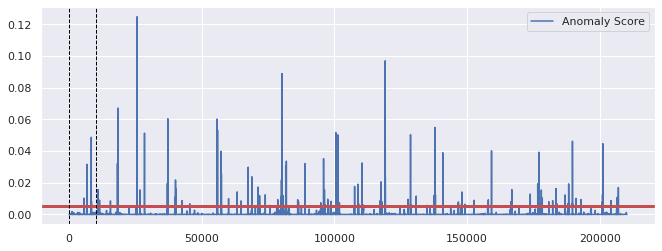

In [9]:
#Visual abnormal score
plt.plot(score_list, label='Anomaly Score')
plt.axhline(y=threshold, color='r', linewidth=3)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axvline(x=10080, color='black', linestyle='--', linewidth=1)
plt.legend()
len(score_list)

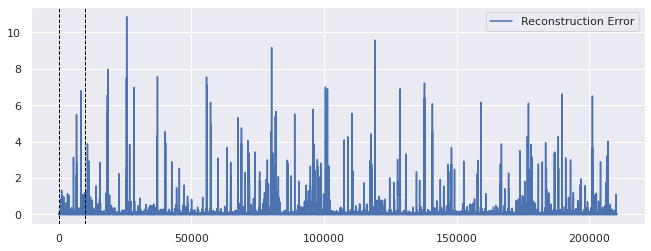

In [10]:
#Reconstruction Error
plt.plot(recon_err,label='Reconstruction Error')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.axvline(x=10080, color='black', linestyle='--', linewidth=1)
plt.legend()

In [34]:
#1Week=10080minute 
Power_test7=Power_test[:10080]

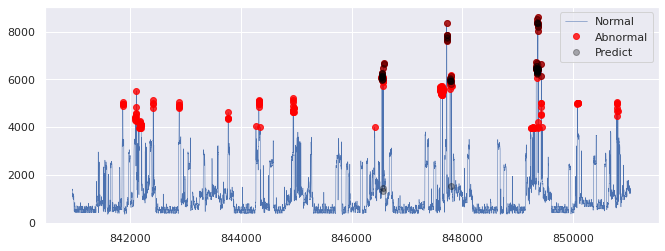

In [13]:
ax_p=Power_test7['P'].plot(linewidth=0.5,label='Normal');
Error_label=Power_test7['P'][Power_test7['label']==1]
Error_predict=Power_test7['P'][Power_test7['y_pred']==1]

Error_label.plot(marker='o',color='red',linestyle='None', alpha=0.8,label='Abnormal')
Error_predict.plot(marker='o',color='black',linestyle='None', alpha=0.3,label='Predict')
ax_p.legend()

SWaT dataSet의 경우

In [23]:
#your label_list, score_list, recon_err의 Paht
label_list=np.load('/content/drive/MyDrive/dataverse_files/label_list.npy')
score_list=np.load('/content/drive/MyDrive/dataverse_files/score_list.npy')
recon_err=np.load('/content/drive/MyDrive/dataverse_files/recon_err.npy')

In [24]:
SWAT_ab_path= '/content/drive/MyDrive/dataverse_files/SWaT_Dataset_Attack_v0.csv'
SWAT_n_path='/content/drive/MyDrive/dataverse_files/SWaT_Dataset_Normal_v1.csv'

In [ ]:
normal = pd.read_csv('/content/drive/MyDrive/dataverse_files/SWaT_Dataset_Normal_v1 (1).csv')
abnormal  = pd.read_csv('/content/drive/MyDrive/dataverse_files/SWaT_Dataset_Attack_v0 (1).csv')

    # Drop first 6 hours
drop_idx = np.arange(19800)
normal = normal.drop(drop_idx)

    # Set index column
normal['date'] = pd.to_datetime(normal['Unnamed: 0'])
del normal['Unnamed: 0']
normal = normal.set_index('date')
abnormal['date'] = pd.to_datetime(abnormal[' Timestamp'])
del abnormal[' Timestamp']
abnormal = abnormal.set_index('date')

    # Change Normal -> 0, Attack -> 1
normal["Unnamed: 52"]=normal["Unnamed: 52"].replace(["Normal","Attack"],[0,1])
abnormal["Normal/Attack"]=abnormal["Normal/Attack"].replace(["Normal","Attack","A ttack"],[0,1,1])

    # Split 7:3, MLE on normal_val
normal_trn = normal.iloc[:int(len(normal)*0.7)]
normal_val = normal.iloc[int(len(normal)*0.7):]

    # Compute normalize statistics
mean = normal_trn.mean()
std = normal_trn.std()

    # Drop std=0 column (51->37, drop 14 column)
col_idx = np.where(std==0)
normal_trn = normal_trn.drop(normal_trn.columns[col_idx[0][:-1]],axis=1)
normal_val = normal_val.drop(normal_val.columns[col_idx[0][:-1]],axis=1)
abnormal = abnormal.drop(abnormal.columns[col_idx[0][:-1]],axis=1)

In [26]:
#만일의 경우 데이터 맞춤
if len(abnormal)!=len(label_list):
  abnormal=abnormal[:len(label_list)]

In [27]:
#threshold
threshold = np.mean(score_list)+3*np.std(score_list)

In [29]:
  #Predict abnormal
y_pred = [int(score>threshold) for score in score_list]
abnormal['y_pred']=y_pred
abnormal

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,P205,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,P602,Normal/Attack,y_pred
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,262.0161,8.396437,328.6337,2.445391,2,2,2,19.74838,2.206835,956.1651,1,2,1,1,1,2,148.8080,156.0882,1.713517,942.0662,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,1,0,0
2015-12-28 10:00:01,2.446274,522.8860,2,2,262.0161,8.396437,328.6337,2.445391,2,2,2,19.74838,2.208244,956.1651,1,2,1,1,1,2,148.8080,156.0882,1.715952,942.0277,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,1,0,0
2015-12-28 10:00:02,2.489191,522.8467,2,2,262.0161,8.394514,328.6337,2.442316,2,2,2,19.69076,2.208628,956.4855,1,2,1,1,1,2,148.8080,156.0882,1.715952,941.8739,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.735269,0.308619,250.8812,1.649953,189.6789,0.000128,1,0,0
2015-12-28 10:00:03,2.534350,522.9645,2,2,262.0161,8.394514,328.6337,2.442316,2,2,2,19.69076,2.208628,956.8060,1,2,1,1,1,2,148.8080,156.0882,1.714670,941.7970,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.6148,0.000128,1,0,0
2015-12-28 10:00:04,2.569260,523.4748,2,2,262.0161,8.394514,328.6337,2.443085,2,2,2,19.69076,2.208628,957.0864,1,2,1,1,1,2,148.8080,156.0882,1.714670,942.2200,7.878621,144.8859,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.5027,0.000128,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-01 14:59:16,2.524421,517.2728,2,2,168.0979,8.639324,302.1020,2.455643,2,2,2,20.31180,2.195177,972.5872,1,2,1,1,1,2,148.8032,145.5781,1.704034,954.5245,7.744681,139.0669,257.3379,14.91925,1.713920,1.282567,0.734885,0.308298,251.1055,0.929100,188.7977,0.000000,1,0,0
2016-02-01 14:59:17,2.562534,517.0766,2,2,168.0979,8.639324,302.1020,2.458078,2,2,2,20.37903,2.194280,972.6673,1,2,1,1,1,2,148.8032,145.5781,1.704034,954.5629,7.744681,139.0669,257.3379,14.91925,1.714176,1.282567,0.734885,0.308298,251.1375,0.929100,188.7977,0.000000,1,0,0
2016-02-01 14:59:18,2.617301,517.3906,2,2,168.0979,8.641246,302.1020,2.458078,2,2,2,20.37903,2.194280,972.6673,1,2,1,1,1,2,148.8032,145.5781,1.704034,954.7936,7.744681,139.0669,257.3379,14.91925,1.714176,1.274625,0.734885,0.308298,251.1375,0.929100,188.8939,0.000000,1,0,0


449880

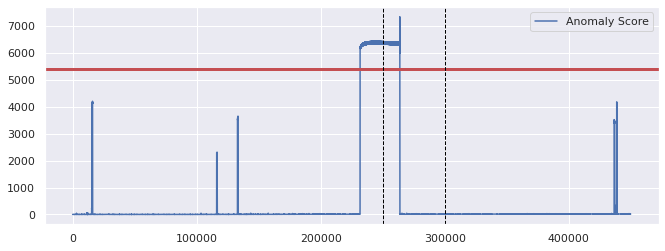

In [30]:
#Visual abnormal score
plt.plot(score_list, label='Anomaly Score')
plt.axhline(y=threshold, color='r', linewidth=3)
plt.axvline(x=250000, color='black', linestyle='--', linewidth=1)#RoI
plt.axvline(x=300000, color='black', linestyle='--', linewidth=1)
plt.legend()
len(score_list)

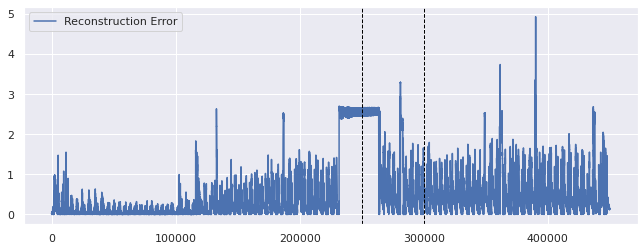

In [33]:
#Reconstruction Error
plt.plot(recon_err[:,1],label='Reconstruction Error')
plt.axvline(x=250000, color='black', linestyle='--', linewidth=1)
plt.axvline(x=300000, color='black', linestyle='--', linewidth=1)
plt.legend()

In [36]:
#ROI
abnormal_RoI=abnormal[250000:300000]

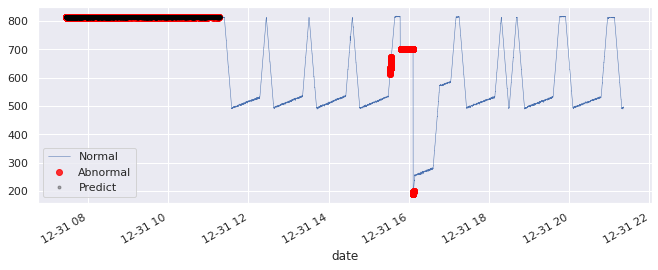

In [39]:
#
ax_an=abnormal_RoI['LIT101'].plot(linewidth=0.5,label='Normal');
Error_label=abnormal_RoI['LIT101'][abnormal_RoI['Normal/Attack']==1]
Error_predict=abnormal_RoI['LIT101'][abnormal_RoI['y_pred']==1]

Error_label.plot(marker='o',color='red',linestyle='None', alpha=0.8,label='Abnormal')
Error_predict.plot(marker='.',color='black',linestyle='None', alpha=0.3,label='Predict')
ax_an.legend()